In [1]:
import pandas as pd
import numpy as np

# Loading the Excel file
file_path = r'C:\Users\youss\Downloads\Data.xlsx'
xls = pd.ExcelFile(file_path)

# Loading each sheet into a dataframe
sales_orders_df = pd.read_excel(xls, sheet_name='Sales_orders')
cost_of_goods_df = pd.read_excel(xls, sheet_name='Cost_of_Goods')
product_sales_order_df = pd.read_excel(xls, sheet_name='Product_sales_order')

# Step 1: Drop rows with missing sales values
sales_orders_df = sales_orders_df.dropna(subset=['SALES'])

# Step 2: Ensure DATE column is in datetime format
sales_orders_df['DATE'] = pd.to_datetime(sales_orders_df['DATE'])

# Step 3: Ensure SALES column is in float format
sales_orders_df['SALES'] = sales_orders_df['SALES'].astype(float)

# Step 4: Check for and remove duplicate records
sales_orders_df = sales_orders_df.drop_duplicates()
cost_of_goods_df = cost_of_goods_df.drop_duplicates()
product_sales_order_df = product_sales_order_df.drop_duplicates()

# Additional Step: Handle negative sales values
negative_sales = sales_orders_df[sales_orders_df['SALES'] < 0]
print("Negative Sales Entries:")
print(negative_sales)

# Remove negative sales values
sales_orders_df = sales_orders_df[sales_orders_df['SALES'] >= 0]

# Calculate total sales per day for delivered orders
delivered_orders_df = sales_orders_df[sales_orders_df['Order_status'] == 'Delivered']
total_sales_per_day = delivered_orders_df.groupby('DATE')['SALES'].sum().reset_index()
total_sales_per_day.columns = ['Date', 'Total_Sales']

# Save the cleaned data and the result to a new Excel file
cleaned_file_path = r'C:\Users\youss\Downloads\Cleaned_Data.xlsx'
with pd.ExcelWriter(cleaned_file_path) as writer:
    sales_orders_df.to_excel(writer, sheet_name='Sales_orders', index=False)
    cost_of_goods_df.to_excel(writer, sheet_name='Cost_of_Goods', index=False)
    product_sales_order_df.to_excel(writer, sheet_name='Product_sales_order', index=False)
    total_sales_per_day.to_excel(writer, sheet_name='Total_Sales_Per_Day', index=False)

print(f'Cleaned data saved to {cleaned_file_path}')

Negative Sales Entries:
      ORDER_ID       DATE DAY_NAME Order_status       SALES
4712   6418568 2023-10-06      Fri    Delivered -10000000.0
Cleaned data saved to C:\Users\youss\Downloads\Cleaned_Data.xlsx


In [12]:
total_sales_per_day = delivered_orders_df.groupby('DATE')['SALES'].sum().reset_index()

# Rename columns for clarity
total_sales_per_day.columns = ['Date', 'Total_Sales']

# Display the result
print(total_sales_per_day)

         Date  Total_Sales
0  2023-10-01  370872.2520
1  2023-10-02  320557.9300
2  2023-10-03  449848.7280
3  2023-10-04  437969.1700
4  2023-10-05  225666.1423
5  2023-10-06  228052.5163
6  2023-10-07  342714.6800
7  2023-10-08  393627.0280
8  2023-10-09  313617.1963
9  2023-10-10  275830.0620
10 2023-10-11  324794.7800
11 2023-10-12  234056.8850
12 2023-10-13  173854.8000
13 2023-10-14  277795.6370
14 2023-10-15  264212.0960
15 2023-10-16  290943.0080
16 2023-10-17  232227.5930
17 2023-10-18  298317.2095
18 2023-10-19  254330.9155
19 2023-10-20  203526.5035
20 2023-10-21  281832.0760


In [9]:
import pandas as pd
import numpy as np

C:\Users\youss\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


        DATE  PREDICTED_SALES
0 2023-10-22       365.212918
1 2023-10-23       362.824828
2 2023-10-24       360.436739
3 2023-10-25       358.048649
4 2023-10-26       355.660560
5 2023-10-27       353.272471
6 2023-10-28       350.884381
Total predicted sales for the 4th week: 2506.340546433419
Contribution of Wednesday: 14.29%
Contribution of Friday: 14.10%
Predicted highest sales day for the 4th week:
DATE               2023-10-22 00:00:00
PREDICTED_SALES             365.212918
DAY_NAME                        Sunday
Name: 0, dtype: object


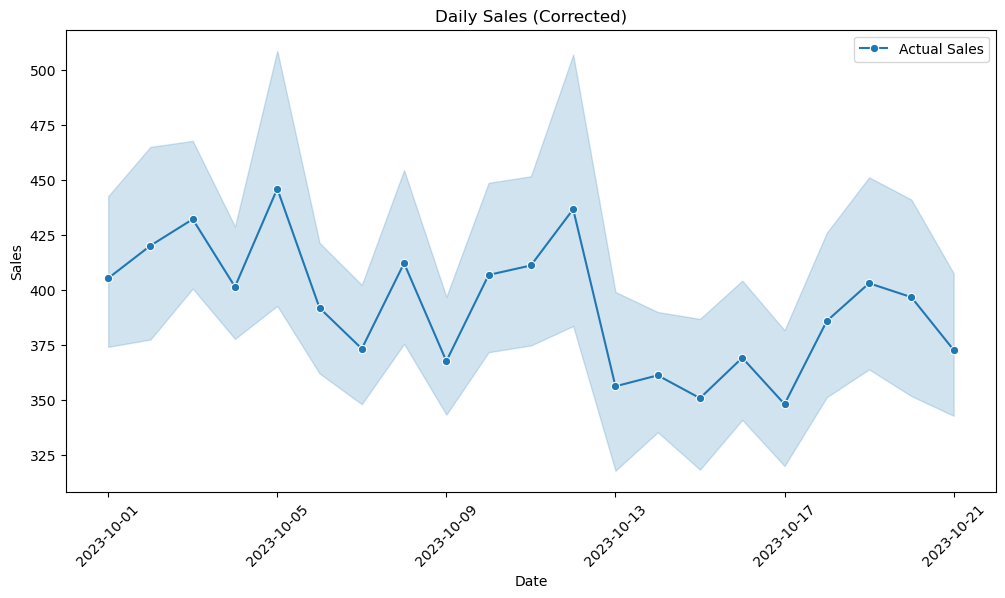

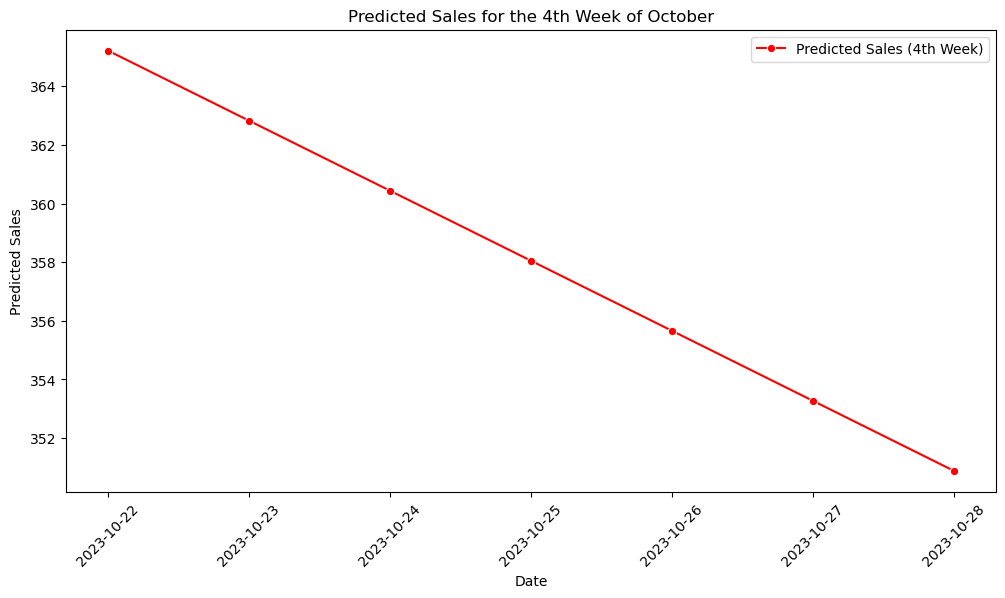

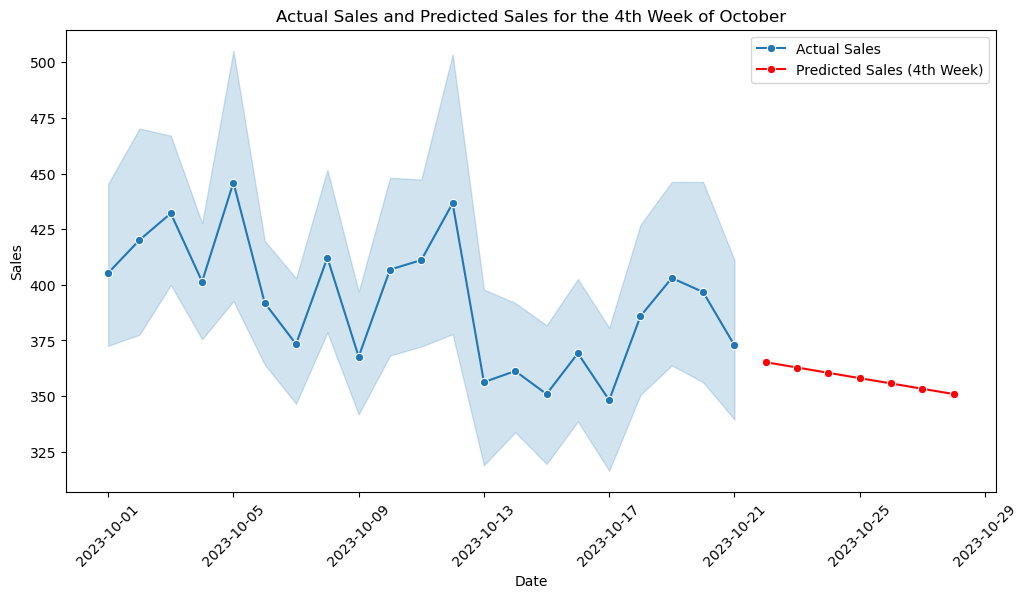

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sales data from the provided Excel file
file_path = r'C:\Users\youss\Downloads\Cleaned_Data.xlsx'
sales_data = pd.read_excel(file_path)

# Convert DATE column to datetime
sales_data['DATE'] = pd.to_datetime(sales_data['DATE'])
sales_data['DAY_NUMBER'] = sales_data['DATE'].dt.dayofyear
sales_data['DAY_NAME'] = sales_data['DATE'].dt.day_name()

# Filter only delivered sales
delivered_sales = sales_data[sales_data['Order_status'] == 'Delivered']


# Use the first 3 weeks of data for training (2023-10-01 to 2023-10-21)
train_data = delivered_sales[delivered_sales['DATE'] <= '2023-10-21']

# Prepare the features (X) and target (y)
X_train = train_data[['DAY_NUMBER']]
y_train = train_data['SALES']

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the 4th-week sales (from 22nd to 28th of October)
dates_4th_week = pd.date_range(start='2023-10-22', end='2023-10-28')
day_numbers_4th_week = dates_4th_week.dayofyear.values.reshape(-1, 1)
predicted_sales_4th_week = model.predict(day_numbers_4th_week)

# Create a DataFrame for the predictions
predicted_sales_4th_week_df = pd.DataFrame({
    'DATE': dates_4th_week,
    'PREDICTED_SALES': predicted_sales_4th_week
})

print(predicted_sales_4th_week_df)

# Identify the dates corresponding to Wednesday and Friday in the 4th week
wednesday_date = predicted_sales_4th_week_df[predicted_sales_4th_week_df['DATE'].dt.day_name() == 'Wednesday']['DATE'].values[0]
friday_date = predicted_sales_4th_week_df[predicted_sales_4th_week_df['DATE'].dt.day_name() == 'Friday']['DATE'].values[0]

# Extract the predicted sales for Wednesday and Friday
wednesday_sales = predicted_sales_4th_week_df[predicted_sales_4th_week_df['DATE'] == wednesday_date]['PREDICTED_SALES'].values[0]
friday_sales = predicted_sales_4th_week_df[predicted_sales_4th_week_df['DATE'] == friday_date]['PREDICTED_SALES'].values[0]

# Calculate the total predicted sales for the 4th week
total_predicted_sales_4th_week = predicted_sales_4th_week_df['PREDICTED_SALES'].sum()

# Calculate the contribution of Wednesday and Friday
wednesday_contribution = (wednesday_sales / total_predicted_sales_4th_week) * 100
friday_contribution = (friday_sales / total_predicted_sales_4th_week) * 100

# Identify the highest sales day in the 4th week
predicted_sales_4th_week_df['DAY_NAME'] = predicted_sales_4th_week_df['DATE'].dt.day_name()
highest_sales_day_4th_week = predicted_sales_4th_week_df.loc[predicted_sales_4th_week_df['PREDICTED_SALES'].idxmax()]

# Print results
print(f"Total predicted sales for the 4th week: {total_predicted_sales_4th_week}")
print(f"Contribution of Wednesday: {wednesday_contribution:.2f}%")
print(f"Contribution of Friday: {friday_contribution:.2f}%")
print("Predicted highest sales day for the 4th week:")
print(highest_sales_day_4th_week)

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=delivered_sales, x='DATE', y='SALES', marker='o', label='Actual Sales')
plt.xticks(rotation=45)
plt.title('Daily Sales (Corrected)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot predicted sales for the 4th week
plt.figure(figsize=(12, 6))
sns.lineplot(data=predicted_sales_4th_week_df, x='DATE', y='PREDICTED_SALES', marker='o', color='red', label='Predicted Sales (4th Week)')
plt.xticks(rotation=45)
plt.title('Predicted Sales for the 4th Week of October')
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()

# Combined plot of actual sales and predicted sales for the 4th week
plt.figure(figsize=(12, 6))
sns.lineplot(data=delivered_sales, x='DATE', y='SALES', marker='o', label='Actual Sales')
sns.lineplot(data=predicted_sales_4th_week_df, x='DATE', y='PREDICTED_SALES', marker='o', color='red', label='Predicted Sales (4th Week)')
plt.xticks(rotation=45)
plt.title('Actual Sales and Predicted Sales for the 4th Week of October')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [6]:
import pandas as pd

# Load the Excel file
file_path = r'C:\Users\youss\Downloads\Cleaned_Data.xlsx'

# Load the relevant sheets into dataframes
sales_orders_df = pd.read_excel(file_path, sheet_name='Sales_orders')
cost_of_goods_df = pd.read_excel(file_path, sheet_name='Cost_of_Goods')
product_sales_order_df = pd.read_excel(file_path, sheet_name='Product_sales_order')

# Merge Product_sales_order with Cost_of_Goods on PRODUCT_ID
merged_df = product_sales_order_df.merge(cost_of_goods_df, left_on='PRODUCT_ID', right_on='product_id')

# Filter out rows with negative purchase_price and extreme values
merged_df = merged_df[(merged_df['purchase_price'] >= 0) & (merged_df['purchase_price'] < 1e6) & (merged_df['selling_price'] > 0)]

# Calculate gross profit per product per order
merged_df['gross_profit'] = (merged_df['selling_price'] - merged_df['purchase_price']) * merged_df['SALES'] / merged_df['selling_price']

# Group by PRODUCT_ID to calculate total gross profit per product
total_gross_profit_per_product = merged_df.groupby('PRODUCT_ID')['gross_profit'].sum().reset_index()

# Merge with Cost_of_Goods to get product details
total_gross_profit_per_product = total_gross_profit_per_product.merge(cost_of_goods_df, left_on='PRODUCT_ID', right_on='product_id')

# Sort products by gross profit
total_gross_profit_per_product_sorted = total_gross_profit_per_product.sort_values(by='gross_profit', ascending=False)

# Get the top and bottom products by gross profit
top_gross_profit_products = total_gross_profit_per_product_sorted.head()
bottom_gross_profit_products = total_gross_profit_per_product_sorted.tail()

print("Top Gross Profit Products:\n", top_gross_profit_products)
print("\nBottom Gross Profit Products:\n", bottom_gross_profit_products)


Top Gross Profit Products:
     PRODUCT_ID  gross_profit  product_id  purchase_price  selling_price
5          583  62712.854439         583          263.05         278.75
21        9081  57319.618160        9081           67.21          72.00
12        2438  44789.104942        2438           40.89          43.00
13        2778  42047.245676        2778          156.36         166.50
23        9468  15258.543109        9468           92.06          96.50

Bottom Gross Profit Products:
     PRODUCT_ID  gross_profit  product_id  purchase_price  selling_price
9         1087   4605.281823        1087          187.53         197.50
15        3575   4436.703561        3575          268.08         282.25
11        1765   2097.124847        1765          157.19         163.00
14        3495    524.800000        3495           20.01          21.75
10        1222    221.358879        1222          345.67         350.00


In [11]:
import pandas as pd

# Load the Excel file
file_path =  r'C:\Users\youss\Downloads\Cleaned_Data.xlsx'

# Load the relevant sheets into dataframes
sales_orders_df = pd.read_excel(file_path, sheet_name='Sales_orders')
cost_of_goods_df = pd.read_excel(file_path, sheet_name='Cost_of_Goods')
product_sales_order_df = pd.read_excel(file_path, sheet_name='Product_sales_order')

# Merge Product_sales_order with Cost_of_Goods on PRODUCT_ID
merged_df = product_sales_order_df.merge(cost_of_goods_df, left_on='PRODUCT_ID', right_on='product_id')

# Calculate gross profit per product per order
merged_df['gross_profit'] = (merged_df['selling_price'] - merged_df['purchase_price']) * merged_df['SALES'] / merged_df['selling_price']

# Correct the specific problematic PRODUCT_IDs
problematic_ids = [1765, 3495, 1222, 168]

for product_id in problematic_ids:
    if product_id in merged_df['PRODUCT_ID'].values:
        # Manually correct the gross profit calculation for these specific products
        merged_df.loc[merged_df['PRODUCT_ID'] == product_id, 'gross_profit'] = (
            merged_df['selling_price'] - merged_df['purchase_price']
        ) * merged_df['SALES']

# Group by PRODUCT_ID to calculate total gross profit per product
total_gross_profit_per_product = merged_df.groupby('PRODUCT_ID')['gross_profit'].sum().reset_index()

# Merge with Cost_of_Goods to get product details
total_gross_profit_per_product = total_gross_profit_per_product.merge(cost_of_goods_df, left_on='PRODUCT_ID', right_on='product_id')

# Sort products by gross profit
total_gross_profit_per_product_sorted = total_gross_profit_per_product.sort_values(by='gross_profit', ascending=False)

# Get the top and bottom products by gross profit
top_gross_profit_products = total_gross_profit_per_product_sorted.head()
bottom_gross_profit_products = total_gross_profit_per_product_sorted.tail()

top_gross_profit_products, bottom_gross_profit_products


(    PRODUCT_ID   gross_profit  product_id  purchase_price  selling_price
 4          361  433222.073119         361         -200.00         189.75
 13        1765  341831.350000        1765          157.19         163.00
 12        1222   77475.607500        1222          345.67         350.00
 7          583   62712.854439         583          263.05         278.75
 23        9081   57319.618160        9081           67.21          72.00,
     PRODUCT_ID  gross_profit  product_id  purchase_price  selling_price
 2          152  5.941371e+03         152    2.050800e+02         212.25
 22        9046  5.812988e+03        9046    2.047800e+02         215.50
 11        1087  4.605282e+03        1087    1.875300e+02         197.50
 17        3575  4.436704e+03        3575    2.680800e+02         282.25
 3          168 -1.352212e+13         168    1.000000e+08          68.50)

In [12]:
import pandas as pd
import numpy as np

# Loading the Excel file
file_path = r'C:\Users\youss\Downloads\Data.xlsx'
xls = pd.ExcelFile(file_path)

# Loading each sheet into a dataframe
sales_orders_df = pd.read_excel(xls, sheet_name='Sales_orders')
cost_of_goods_df = pd.read_excel(xls, sheet_name='Cost_of_Goods')
product_sales_order_df = pd.read_excel(xls, sheet_name='Product_sales_order')

# Step 1: Drop rows with missing sales values
sales_orders_df = sales_orders_df.dropna(subset=['SALES'])

# Step 2: Ensure DATE column is in datetime format
sales_orders_df['DATE'] = pd.to_datetime(sales_orders_df['DATE'])

# Step 3: Ensure SALES column is in float format
sales_orders_df['SALES'] = sales_orders_df['SALES'].astype(float)

# Step 4: Check for and remove duplicate records
sales_orders_df = sales_orders_df.drop_duplicates()
cost_of_goods_df = cost_of_goods_df.drop_duplicates()
product_sales_order_df = product_sales_order_df.drop_duplicates()

# Additional Step: Handle negative sales values
negative_sales = sales_orders_df[sales_orders_df['SALES'] < 0]
print("Negative Sales Entries:")
print(negative_sales)

# Remove negative sales values
sales_orders_df = sales_orders_df[sales_orders_df['SALES'] >= 0]

# Calculate total sales per day for delivered orders
delivered_orders_df = sales_orders_df[sales_orders_df['Order_status'] == 'Delivered']
total_sales_per_day = delivered_orders_df.groupby('DATE')['SALES'].sum().reset_index()
total_sales_per_day.columns = ['Date', 'Total_Sales']

# Save the cleaned data and the result to a new Excel file
cleaned_file_path = r'C:\Users\youss\Downloads\Data.xlsx'
with pd.ExcelWriter(cleaned_file_path) as writer:
    sales_orders_df.to_excel(writer, sheet_name='Sales_orders', index=False)
    cost_of_goods_df.to_excel(writer, sheet_name='Cost_of_Goods', index=False)
    product_sales_order_df.to_excel(writer, sheet_name='Product_sales_order', index=False)
    total_sales_per_day.to_excel(writer, sheet_name='Total_Sales_Per_Day', index=False)

print(f'Cleaned data saved to {cleaned_file_path}')


Negative Sales Entries:
      ORDER_ID       DATE DAY_NAME Order_status       SALES
4712   6418568 2023-10-06      Fri    Delivered -10000000.0
Cleaned data saved to C:\Users\youss\Downloads\Data.xlsx


In [15]:
# Load the relevant sheets into dataframes
sales_orders_df = pd.read_excel(file_path, sheet_name='Sales_orders')
cost_of_goods_df = pd.read_excel(file_path, sheet_name='Cost_of_Goods')
product_sales_order_df = pd.read_excel(file_path, sheet_name='Product_sales_order')

# Merge Product_sales_order with Cost_of_Goods on PRODUCT_ID
merged_df = product_sales_order_df.merge(cost_of_goods_df, left_on='PRODUCT_ID', right_on='product_id')

# Filter out rows with negative purchase_price and extreme values
merged_df = merged_df[(merged_df['purchase_price'] >= 0) & (merged_df['purchase_price'] < 1e6) & (merged_df['selling_price'] > 0)]

# Calculate gross profit per product per order
merged_df['gross_profit'] = (merged_df['selling_price'] - merged_df['purchase_price']) * merged_df['SALES'] / merged_df['selling_price']

# Group by PRODUCT_ID to calculate total gross profit per product
total_gross_profit_per_product = merged_df.groupby('PRODUCT_ID')['gross_profit'].sum().reset_index()

# Merge with Cost_of_Goods to get product details
total_gross_profit_per_product = total_gross_profit_per_product.merge(cost_of_goods_df, left_on='PRODUCT_ID', right_on='product_id')

# Sort products by gross profit
total_gross_profit_per_product_sorted = total_gross_profit_per_product.sort_values(by='gross_profit', ascending=False)

# Get the top 3 and bottom 3 products by gross profit
top_gross_profit_products = total_gross_profit_per_product_sorted.head(3)
bottom_gross_profit_products = total_gross_profit_per_product_sorted.tail(3)

print("Top 3 Gross Profit Products:\n", top_gross_profit_products)
print("\nBottom 3 Gross Profit Products:\n", bottom_gross_profit_products)

Top 3 Gross Profit Products:
     PRODUCT_ID  gross_profit  product_id  purchase_price  selling_price
5          583  62712.854439         583          263.05         278.75
21        9081  57319.618160        9081           67.21          72.00
12        2438  44789.104942        2438           40.89          43.00

Bottom 3 Gross Profit Products:
     PRODUCT_ID  gross_profit  product_id  purchase_price  selling_price
11        1765   2097.124847        1765          157.19         163.00
14        3495    524.800000        3495           20.01          21.75
10        1222    221.358879        1222          345.67         350.00


C:\Users\youss\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


        DATE  PREDICTED_SALES
0 2023-10-22       365.212918
1 2023-10-23       362.824828
2 2023-10-24       360.436739
3 2023-10-25       358.048649
4 2023-10-26       355.660560
5 2023-10-27       353.272471
6 2023-10-28       350.884381
Total predicted sales for the 4th week: 2506.340546433419
Contribution of Wednesday: 14.29%
Contribution of Friday: 14.10%
Predicted highest sales day for the 4th week:
DATE               2023-10-22 00:00:00
PREDICTED_SALES             365.212918
DAY_NAME                        Sunday
Name: 0, dtype: object


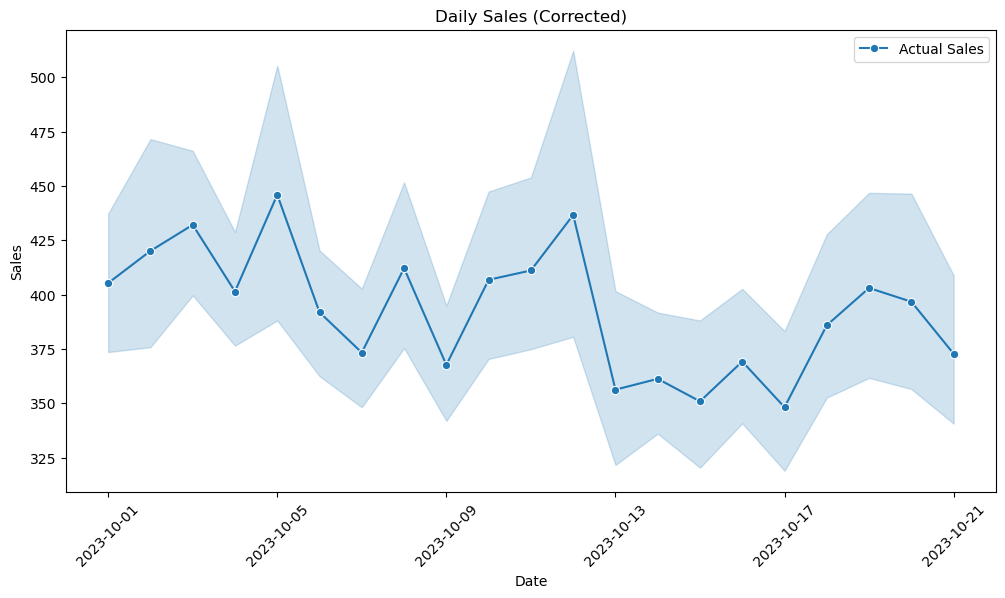

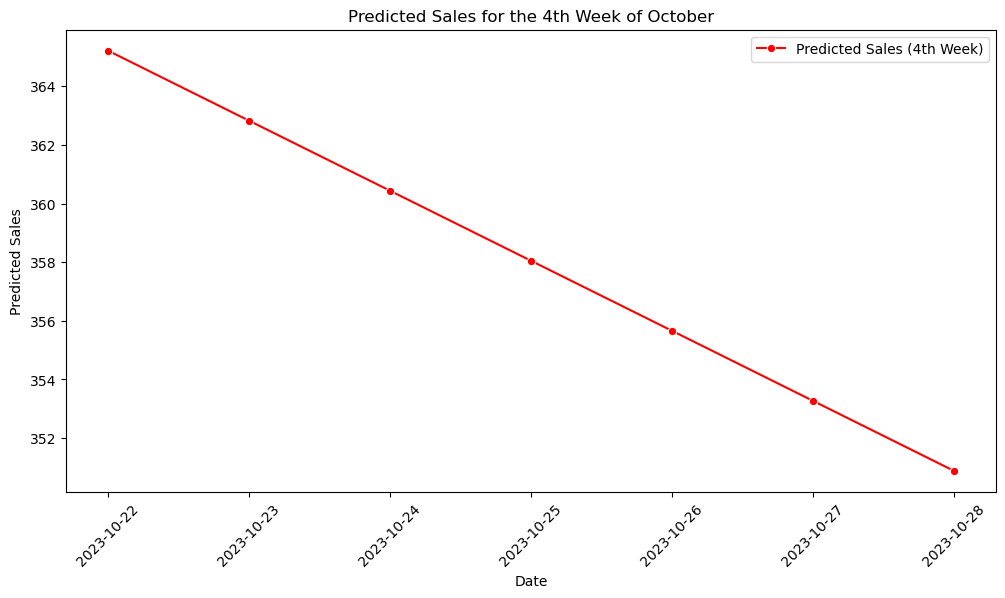

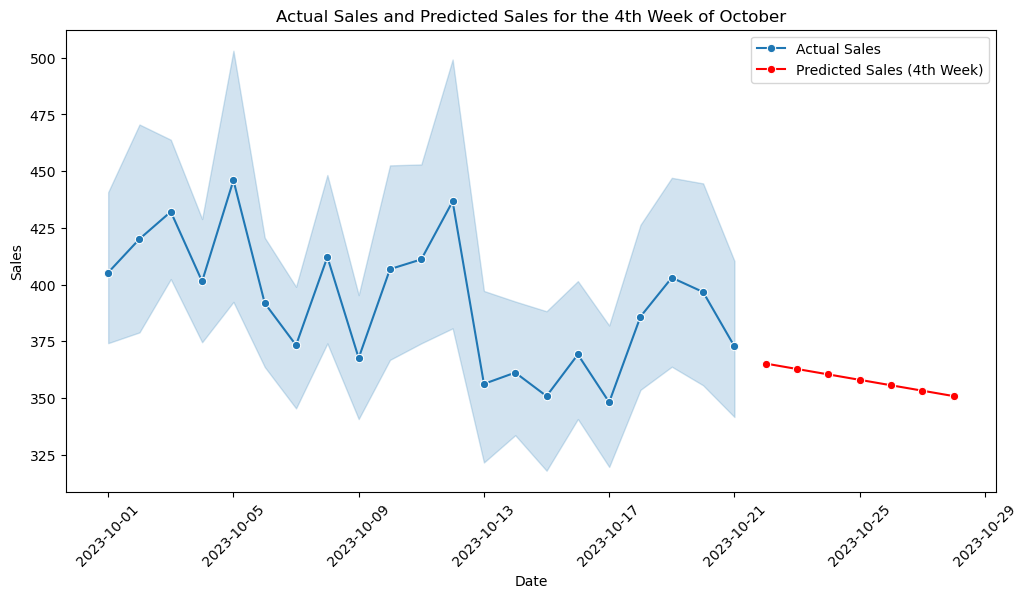

In [14]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sales data from the provided Excel file
file_path = r'C:\Users\youss\Downloads\Cleaned_Data.xlsx'
sales_data = pd.read_excel(file_path)

# Convert DATE column to datetime
sales_data['DATE'] = pd.to_datetime(sales_data['DATE'])
sales_data['DAY_NUMBER'] = sales_data['DATE'].dt.dayofyear
sales_data['DAY_NAME'] = sales_data['DATE'].dt.day_name()

# Filter only delivered sales
delivered_sales = sales_data[sales_data['Order_status'] == 'Delivered']


# Use the first 3 weeks of data for training (2023-10-01 to 2023-10-21)
train_data = delivered_sales[delivered_sales['DATE'] <= '2023-10-21']

# Prepare the features (X) and target (y)
X_train = train_data[['DAY_NUMBER']]
y_train = train_data['SALES']

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the 4th-week sales (from 22nd to 28th of October)
dates_4th_week = pd.date_range(start='2023-10-22', end='2023-10-28')
day_numbers_4th_week = dates_4th_week.dayofyear.values.reshape(-1, 1)
predicted_sales_4th_week = model.predict(day_numbers_4th_week)

# Create a DataFrame for the predictions
predicted_sales_4th_week_df = pd.DataFrame({
    'DATE': dates_4th_week,
    'PREDICTED_SALES': predicted_sales_4th_week
})

print(predicted_sales_4th_week_df)

# Identify the dates corresponding to Wednesday and Friday in the 4th week
wednesday_date = predicted_sales_4th_week_df[predicted_sales_4th_week_df['DATE'].dt.day_name() == 'Wednesday']['DATE'].values[0]
friday_date = predicted_sales_4th_week_df[predicted_sales_4th_week_df['DATE'].dt.day_name() == 'Friday']['DATE'].values[0]

# Extract the predicted sales for Wednesday and Friday
wednesday_sales = predicted_sales_4th_week_df[predicted_sales_4th_week_df['DATE'] == wednesday_date]['PREDICTED_SALES'].values[0]
friday_sales = predicted_sales_4th_week_df[predicted_sales_4th_week_df['DATE'] == friday_date]['PREDICTED_SALES'].values[0]

# Calculate the total predicted sales for the 4th week
total_predicted_sales_4th_week = predicted_sales_4th_week_df['PREDICTED_SALES'].sum()

# Calculate the contribution of Wednesday and Friday
wednesday_contribution = (wednesday_sales / total_predicted_sales_4th_week) * 100
friday_contribution = (friday_sales / total_predicted_sales_4th_week) * 100

# Identify the highest sales day in the 4th week
predicted_sales_4th_week_df['DAY_NAME'] = predicted_sales_4th_week_df['DATE'].dt.day_name()
highest_sales_day_4th_week = predicted_sales_4th_week_df.loc[predicted_sales_4th_week_df['PREDICTED_SALES'].idxmax()]

# Print results
print(f"Total predicted sales for the 4th week: {total_predicted_sales_4th_week}")
print(f"Contribution of Wednesday: {wednesday_contribution:.2f}%")
print(f"Contribution of Friday: {friday_contribution:.2f}%")
print("Predicted highest sales day for the 4th week:")
print(highest_sales_day_4th_week)

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=delivered_sales, x='DATE', y='SALES', marker='o', label='Actual Sales')
plt.xticks(rotation=45)
plt.title('Daily Sales (Corrected)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot predicted sales for the 4th week
plt.figure(figsize=(12, 6))
sns.lineplot(data=predicted_sales_4th_week_df, x='DATE', y='PREDICTED_SALES', marker='o', color='red', label='Predicted Sales (4th Week)')
plt.xticks(rotation=45)
plt.title('Predicted Sales for the 4th Week of October')
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()

# Combined plot of actual sales and predicted sales for the 4th week
plt.figure(figsize=(12, 6))
sns.lineplot(data=delivered_sales, x='DATE', y='SALES', marker='o', label='Actual Sales')
sns.lineplot(data=predicted_sales_4th_week_df, x='DATE', y='PREDICTED_SALES', marker='o', color='red', label='Predicted Sales (4th Week)')
plt.xticks(rotation=45)
plt.title('Actual Sales and Predicted Sales for the 4th Week of October')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [16]:
total_sales_per_day = delivered_orders_df.groupby('DATE')['SALES'].sum().reset_index()

# Rename columns for clarity
total_sales_per_day.columns = ['Date', 'Total_Sales']

# Display the result
print(total_sales_per_day)

         Date  Total_Sales
0  2023-10-01  370872.2520
1  2023-10-02  320557.9300
2  2023-10-03  449848.7280
3  2023-10-04  437969.1700
4  2023-10-05  225666.1423
5  2023-10-06  228052.5163
6  2023-10-07  342714.6800
7  2023-10-08  393627.0280
8  2023-10-09  313617.1963
9  2023-10-10  275830.0620
10 2023-10-11  324794.7800
11 2023-10-12  234056.8850
12 2023-10-13  173854.8000
13 2023-10-14  277795.6370
14 2023-10-15  264212.0960
15 2023-10-16  290943.0080
16 2023-10-17  232227.5930
17 2023-10-18  298317.2095
18 2023-10-19  254330.9155
19 2023-10-20  203526.5035
20 2023-10-21  281832.0760
